In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
import nltk
import re

In [7]:
#pip install wordcloud

In [8]:
data = pd.read_csv("unordered.csv")
rel_cols = ['Given the chance, would you apply to SYDE again?',
           'How does your current experience with SYDE compare to what you expected it to be when you applied?',
           'What is the biggest piece of advice/wisdom you would give to someone thinking about applying to SYDE?',
           'If you could describe 1A in one word, what would it be?']
df = data[rel_cols].dropna().rename(columns={'Given the chance, would you apply to SYDE again?' : 'apply_again',
           'How does your current experience with SYDE compare to what you expected it to be when you applied?' : 'expected_experience',
           'What is the biggest piece of advice/wisdom you would give to someone thinking about applying to SYDE?': 'advice',
           'If you could describe 1A in one word, what would it be?':'describe1a'})
df

,apply_again,expected_experience,advice,describe1a
0,Yes,4.0,It won't be easy,Hell
4,Yes,3.0,"Try out many different things in high school, ...",dramatic
5,Yes,5.0,Be sociable,Hectic
6,Yes,4.0,"It’s just a program, it won’t make that much o...",Chaotic
7,Yes,3.0,"Any university degree is a marathon, not a spr...",An Ordeal.
...,...,...,...,...
80,Yes,6.0,If you want the nicest and best co-op communit...,based
83,Yes,3.0,"Grades don't matter as much, so don't stress t...",New
84,Yes,4.0,It is absolutely what you make of it!,Life-changing
90,Yes,3.0,Try hard but you still have to have fun,Fun


In [9]:
apply_df = df['apply_again']
apply_df

0     Yes
4     Yes
5     Yes
6     Yes
7     Yes
     ... 
80    Yes
83    Yes
84    Yes
90    Yes
91    Yes
Name: apply_again, Length: 62, dtype: object

In [10]:
#def wcloud(apply_df):
    #wordcloud = WordCloud(stopwords=STOPWORDS).generate(apply_df)
    #return wordcloud

<AxesSubplot:>

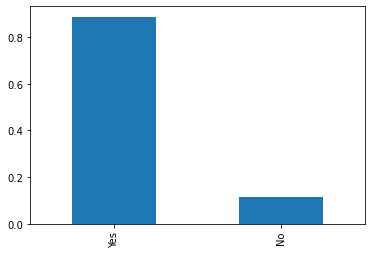

In [11]:
df['apply_again'].value_counts(normalize= True).plot.bar()

In [12]:
data = df[['describe1a', 'advice']]
describe_df = df.groupby('describe1a')['describe1a'].count()
df['describe1a'].count()
data.count()

describe1a    62
advice        62
dtype: int64

In [13]:
describe_df

describe1a
0/10                                     1
Adjustment                               1
Adventurous                              1
Alcohol                                  1
Amazing                                  1
An Ordeal.                               1
Balanced                                 1
Busy                                     1
Change                                   1
Chaotic                                  1
Collaborative                            1
Exciting                                 1
Exhaustion                               1
Eye-opening                              1
F U N K Y                                1
Fast                                     1
Freedom                                  1
Fun                                      2
Fun socially, depressing academically    1
Fun with some difficult times            1
Hectic                                   1
Hell                                     1
Intense                                  2


In [14]:
#Turning the describe1a data frame to a list
described= df['describe1a'].values.tolist()
#Making everything lowercased
for word in range(len(described)):
    described[word] = described[word].lower()
described

['hell',
 'dramatic',
 'hectic',
 'chaotic',
 'an ordeal.',
 'ok.',
 'marathon',
 'new',
 'chaotic and lonely',
 'adventurous',
 'family',
 'fun socially, depressing academically',
 'ok',
 'joyful',
 'amazing',
 'rush',
 'shit',
 'poggywoggy',
 'rollercoaster',
 'fast',
 '0/10',
 'pedantic ',
 'tstsians',
 'change',
 'scrambled',
 'fast',
 'decent',
 'intense',
 'exhaustion',
 'shit',
 'busy',
 'hectic',
 'tstsians',
 'eye-opening',
 'tstsians',
 'mid',
 'unexpected',
 'adjustment',
 'exciting',
 'death ',
 'learning curve ',
 'freedom',
 'tsts',
 'movie ',
 'lit',
 'intense',
 'fun',
 'new',
 'balanced',
 'alcohol',
 'people',
 'new',
 'fun with some difficult times',
 'f u n k y',
 'online',
 'pain',
 'tstsian',
 'based',
 'new',
 'life-changing',
 'fun',
 'collaborative']

In [20]:
#cleaning up the data
clean_described = []
for w in range(0, len(described)):
    clean_described.append(re.sub(" ", "", described[w])) #remove spaces
    clean_described[w] = re.sub("-","", clean_described[w]) #removes periods
clean_described
   

['hell',
 'dramatic',
 'hectic',
 'chaotic',
 'anordeal.',
 'ok.',
 'marathon',
 'new',
 'chaoticandlonely',
 'adventurous',
 'family',
 'funsocially,depressingacademically',
 'ok',
 'joyful',
 'amazing',
 'rush',
 'shit',
 'poggywoggy',
 'rollercoaster',
 'fast',
 '0/10',
 'pedantic',
 'tstsians',
 'change',
 'scrambled',
 'fast',
 'decent',
 'intense',
 'exhaustion',
 'shit',
 'busy',
 'hectic',
 'tstsians',
 'eyeopening',
 'tstsians',
 'mid',
 'unexpected',
 'adjustment',
 'exciting',
 'death',
 'learningcurve',
 'freedom',
 'tsts',
 'movie',
 'lit',
 'intense',
 'fun',
 'new',
 'balanced',
 'alcohol',
 'people',
 'new',
 'funwithsomedifficulttimes',
 'funky',
 'online',
 'pain',
 'tstsian',
 'based',
 'new',
 'lifechanging',
 'fun',
 'collaborative']

In [21]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word in clean_described:
        lemmatized_sentence.append(lemmatizer.lemmatize(word))
    return lemmatized_sentence
lemmatize_words(clean_described)

In [22]:
#removing Noise from data, I don't think it's needed for the describe 1A column but defiitiely for the advice
#import re, string

#def remove_noise(clean_described):
    #cleaned_tokens =[]
    #for token, tag in clean-described:
        #token = re.sub ('')
    

In [38]:
#Converting the Tokenized list to string to apply sentiment.polarity() via TextBlob
text=''
for i in clean_described:
    text += i
print(text)

helldramatichecticchaoticanordeal.ok.marathonnewchaoticandlonelyadventurousfamilyfunsocially,depressingacademicallyokjoyfulamazingrushshitpoggywoggyrollercoasterfast0/10pedantictstsianschangescrambledfastdecentintenseexhaustionshitbusyhectictstsianseyeopeningtstsiansmidunexpectedadjustmentexcitingdeathlearningcurvefreedomtstsmovielitintensefunnewbalancedalcoholpeoplenewfunwithsomedifficulttimesfunkyonlinepaintstsianbasednewlifechangingfuncollaborative


In [62]:
#pip install textblob

In [61]:
#pip install afinn

In [46]:
#Using Afinn which is more focused on words than sentence for both the describe and advice column
df['afinn_score'] = df['describe1a'].apply(afinn.score)
df['afinn_score'].describe()

count    62.000000
mean      0.129032
std       1.644503
min      -4.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       4.000000
Name: afinn_score, dtype: float64

In [53]:
columns_to_display = ['describe1a','afinn_score']
values = df.sort_values(by='afinn_score')[columns_to_display]
values

,describe1a,afinn_score
0,Hell,-4.0
24,Shit,-4.0
14,chaotic and lonely,-4.0
38,shit,-4.0
78,pain,-2.0
...,...,...
20,Joyful,3.0
48,Exciting,3.0
62,Fun,4.0
22,Amazing,4.0


array([[<AxesSubplot:title={'center':'afinn_score'}>]], dtype=object)

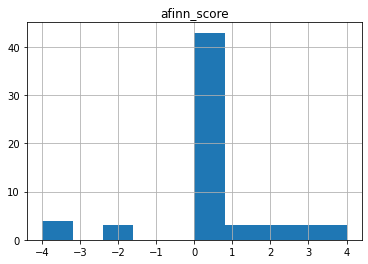

In [54]:
values.hist()

In [56]:
df['afinn_score'] = df['advice'].apply(afinn.score)
df['afinn_score'].describe()

count    62.000000
mean      1.919355
std       3.535758
min      -3.000000
25%       0.000000
50%       1.000000
75%       3.000000
max      16.000000
Name: afinn_score, dtype: float64

In [58]:
columns_to_display = ['advice', 'afinn_score']
values2 = df.sort_values(by='afinn_score')[columns_to_display]
values2

,advice,afinn_score
38,"dont worry about your drop in grades, just foc...",-3.0
39,"Rather than comparing yourself to your peers, ...",-2.0
72,"It will get hard, but don't stress too much",-2.0
40,stop worrying so much and enjoy life,-2.0
79,ELECTIVES ARE A SCAM (for the first couple yea...,-2.0
...,...,...
11,"get cracked before coming here lmao, everyones...",7.0
33,Don't let your grades define you. You're never...,8.0
48,Try your best but don't base your worth on uni...,9.0
44,"Things like ""SYDE is tight, fun, chill, wide r...",16.0


array([[<AxesSubplot:title={'center':'afinn_score'}>]], dtype=object)

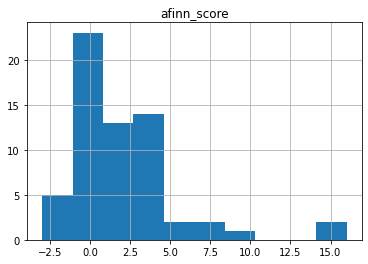

In [60]:
values2.hist()

In [63]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [70]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(df['advice'])

{'neg': 0.06, 'neu': 0.703, 'pos': 0.237, 'compound': 0.9997}

In [72]:
#Vader returns a dictionary(unlike Afinn which returns a single value)
sentiment = df['advice'].apply(analyzer.polarity_scores)
sentiment_df = pd.DataFrame(sentiment.tolist())
sentiment_df.head()

,neg,neu,pos,compound
0,0.445,0.555,0.000,-0.3412
1,0.000,1.000,0.000,0.0000
2,0.000,0.256,0.744,0.4404
3,0.000,0.818,0.182,0.5824
4,0.000,0.769,0.231,0.5859


In [73]:
added_df_sentiment = pd.concat([df,sentiment_df], axis =1)
added_df_sentiment.head()

,apply_again,expected_experience,advice,describe1a,afinn_score,neg,neu,pos,compound
0,Yes,4.0,It won't be easy,Hell,4.0,0.445,0.555,0.000,-0.3412
1,NaN,NaN,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
2,NaN,NaN,NaN,NaN,NaN,0.000,0.256,0.744,0.4404
3,NaN,NaN,NaN,NaN,NaN,0.000,0.818,0.182,0.5824
4,Yes,3.0,"Try out many different things in high school, ...",dramatic,0.0,0.000,0.769,0.231,0.5859


In [78]:
#For ease of testing lets put the whole process in one function so we can try it multiple times
def vaderize(df, column):
    '''Compute the vader polarity scores for a textfield.
    Returns scores and original dataframe'''
    analyzer = SentimentIntensityAnalyzer()
    
    sentiment = df[column].apply(analyzer.polarity_scores)
    
    #Converting to DataFrame
    sdf = pd.DataFrame(sentiment.tolist()).add_prefix('vader_')
    
    #Merge dataframes
    df_combined = pd.concat([df,sdf], axis=1)
    return df_combined

In [81]:
# Calling the function above
df_vaderized = vaderize(df, 'describe1a')
df_vaderized.head(50)

,apply_again,expected_experience,advice,describe1a,afinn_score,vader_neg,vader_neu,vader_pos,vader_compound
0,Yes,4.0,It won't be easy,Hell,4.0,1.000,0.000,0.000,-0.6808
1,NaN,NaN,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
2,NaN,NaN,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
3,NaN,NaN,NaN,NaN,NaN,1.000,0.000,0.000,-0.4939
4,Yes,3.0,"Try out many different things in high school, ...",dramatic,0.0,0.000,1.000,0.000,0.0000
5,Yes,5.0,Be sociable,Hectic,0.0,0.000,1.000,0.000,0.0000
6,Yes,4.0,"It’s just a program, it won’t make that much o...",Chaotic,0.0,0.000,1.000,0.000,0.0000
7,Yes,3.0,"Any university degree is a marathon, not a spr...",An Ordeal.,2.0,0.000,1.000,0.000,0.0000
8,NaN,NaN,NaN,NaN,NaN,0.851,0.149,0.000,-0.6908
9,Yes,4.0,Code,Ok.,0.0,0.000,0.000,1.000,0.3400


<AxesSubplot:ylabel='Frequency'>

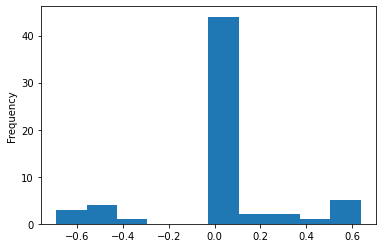

In [83]:
#Let's plot this bitch
df_vaderized['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

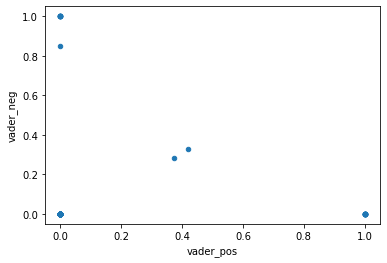

In [86]:
#One more
df_vaderized.plot.scatter(x='vader_pos', y='vader_neg')

In [ ]:
#Lowkey I don't if vader works for us, but if this seems ok to you, 
#that means that a lot of people are nuetral about syde but towards the postive 